In [353]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,plot_confusion_matrix,plot_roc_curve,mean_squared_error
from sklearn import linear_model,metrics,model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [354]:
#Read data
data=pd.read_csv("c:\\users\\nidhi\\desktop\\Betterhealth_data.csv",encoding= 'unicode_escape')
data.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Hawthorne,Census Tract,BRFSS,Health Outcomes,0632548-06037602504,Arthritis among adults aged >=18 Years,%,...,15.2,NaN,NaN,"4,407","(33.905547923, -118.337332298)",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09,Arthritis
1,2017,CA,California,Hawthorne,City,BRFSS,Unhealthy Behaviors,632548,Current smoking among adults aged >=18 Years,%,...,15.9,NaN,NaN,"84,293","(33.914667701, -118.347667728)",UNHBEH,CSMOKING,632548.0,NaN,Current Smoking
2,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,633000,Coronary heart disease among adults aged >=18 ...,%,...,4.8,NaN,NaN,"144,186","(37.6329591551, -122.077051051)",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease
3,2017,CA,California,Hayward,City,BRFSS,Unhealthy Behaviors,633000,Obesity among adults aged >=18 Years,%,...,24.4,NaN,NaN,"144,186","(37.6329591551, -122.077051051)",UNHBEH,OBESITY,633000.0,NaN,Obesity
4,2017,CA,California,Hemet,City,BRFSS,Prevention,633182,Cholesterol screening among adults aged >=18 Y...,%,...,78.3,NaN,NaN,"78,657","(33.7352277311, -116.994605005)",PREVENT,CHOLSCREEN,633182.0,NaN,Cholesterol Screening


Data Cleaning

In [355]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810102 entries, 0 to 810101
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Year                        810102 non-null  int64  
 1   StateAbbr                   810102 non-null  object 
 2   StateDesc                   810102 non-null  object 
 3   CityName                    810047 non-null  object 
 4   GeographicLevel             810102 non-null  object 
 5   DataSource                  810102 non-null  object 
 6   Category                    810102 non-null  object 
 7   UniqueID                    810102 non-null  object 
 8   Measure                     810102 non-null  object 
 9   Data_Value_Unit             810102 non-null  object 
 10  DataValueTypeID             810102 non-null  object 
 11  Data_Value_Type             810102 non-null  object 
 12  Data_Value                  787310 non-null  float64
 13  Low_Confidence

In [356]:
#columns_to_drop
X=data.drop(columns=[ 'Year', 'StateDesc', 'DataSource', 'Measure','Data_Value_Unit', 'Data_Value_Footnote', 'Data_Value_Type', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Data_Value_Footnote_Symbol', 'Category', 'Short_Question_Text'])
X

,StateAbbr,CityName,GeographicLevel,UniqueID,DataValueTypeID,Data_Value,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS
0,CA,Hawthorne,Census Tract,0632548-06037602504,CrdPrv,14.6,"4,407","(33.905547923, -118.337332298)",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09
1,CA,Hawthorne,City,632548,CrdPrv,15.4,"84,293","(33.914667701, -118.347667728)",UNHBEH,CSMOKING,632548.0,NaN
2,CA,Hayward,City,633000,AgeAdjPrv,4.8,"144,186","(37.6329591551, -122.077051051)",HLTHOUT,CHD,633000.0,NaN
3,CA,Hayward,City,633000,CrdPrv,24.2,"144,186","(37.6329591551, -122.077051051)",UNHBEH,OBESITY,633000.0,NaN
4,CA,Hemet,City,633182,AgeAdjPrv,78.0,"78,657","(33.7352277311, -116.994605005)",PREVENT,CHOLSCREEN,633182.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
810097,WI,Madison,Census Tract,5548000-55025000202,CrdPrv,3.8,"3,016","(43.0683437287, -89.4935639435)",HLTHOUT,COPD,5548000.0,5.502500e+10
810098,WA,Tacoma,Census Tract,5370000-53053061900,CrdPrv,74.2,"1,961","(47.2276735186, -122.434170835)",PREVENT,CHOLSCREEN,5370000.0,5.305306e+10
810099,WA,Vancouver,Census Tract,5374060-53011041331,CrdPrv,28.1,"2,565","(45.6495869118, -122.552061838)",HLTHOUT,HIGHCHOL,5374060.0,5.301104e+10
810100,WI,Appleton,Census Tract,5502375-55087010200,CrdPrv,27.0,"4,048","(44.2675274909, -88.4261164976)",UNHBEH,BINGE,5502375.0,5.508701e+10


In [357]:
#Drop missing values
data_withoutnulls=X.dropna()
data_withoutnulls.info()
data_withoutnulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759349 entries, 0 to 810101
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   StateAbbr        759349 non-null  object 
 1   CityName         759349 non-null  object 
 2   GeographicLevel  759349 non-null  object 
 3   UniqueID         759349 non-null  object 
 4   DataValueTypeID  759349 non-null  object 
 5   Data_Value       759349 non-null  float64
 6   PopulationCount  759349 non-null  object 
 7   GeoLocation      759349 non-null  object 
 8   CategoryID       759349 non-null  object 
 9   MeasureId        759349 non-null  object 
 10  CityFIPS         759349 non-null  float64
 11  TractFIPS        759349 non-null  float64
dtypes: float64(3), object(9)
memory usage: 75.3+ MB


,StateAbbr,CityName,GeographicLevel,UniqueID,DataValueTypeID,Data_Value,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS
0,CA,Hawthorne,Census Tract,0632548-06037602504,CrdPrv,14.6,"4,407","(33.905547923, -118.337332298)",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09
5,CA,Indio,Census Tract,0636448-06065045213,CrdPrv,22.0,"5,006","(33.7144617083, -116.258246324)",HLTHOUT,ARTHRITIS,636448.0,6.065045e+09
8,CA,Inglewood,Census Tract,0636546-06037601801,CrdPrv,12.7,"2,472","(33.9439711273, -118.349937728)",HLTHOUT,DIABETES,636546.0,6.037602e+09
14,AL,Hoover,Census Tract,0135896-01073014302,CrdPrv,81.9,"1,636","(33.3923792867, -86.8833755105)",PREVENT,MAMMOUSE,135896.0,1.073014e+09
17,AL,Huntsville,Census Tract,0137000-01089002922,CrdPrv,9.3,"4,387","(34.612755588, -86.5329568642)",HLTHOUT,DIABETES,137000.0,1.089003e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
810097,WI,Madison,Census Tract,5548000-55025000202,CrdPrv,3.8,"3,016","(43.0683437287, -89.4935639435)",HLTHOUT,COPD,5548000.0,5.502500e+10
810098,WA,Tacoma,Census Tract,5370000-53053061900,CrdPrv,74.2,"1,961","(47.2276735186, -122.434170835)",PREVENT,CHOLSCREEN,5370000.0,5.305306e+10
810099,WA,Vancouver,Census Tract,5374060-53011041331,CrdPrv,28.1,"2,565","(45.6495869118, -122.552061838)",HLTHOUT,HIGHCHOL,5374060.0,5.301104e+10
810100,WI,Appleton,Census Tract,5502375-55087010200,CrdPrv,27.0,"4,048","(44.2675274909, -88.4261164976)",UNHBEH,BINGE,5502375.0,5.508701e+10


In [358]:
data_withoutnulls=X.dropna()
data_withoutnulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759349 entries, 0 to 810101
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   StateAbbr        759349 non-null  object 
 1   CityName         759349 non-null  object 
 2   GeographicLevel  759349 non-null  object 
 3   UniqueID         759349 non-null  object 
 4   DataValueTypeID  759349 non-null  object 
 5   Data_Value       759349 non-null  float64
 6   PopulationCount  759349 non-null  object 
 7   GeoLocation      759349 non-null  object 
 8   CategoryID       759349 non-null  object 
 9   MeasureId        759349 non-null  object 
 10  CityFIPS         759349 non-null  float64
 11  TractFIPS        759349 non-null  float64
dtypes: float64(3), object(9)
memory usage: 75.3+ MB


In [359]:
#Drop AgeAdjPr data values
cleandata=data_withoutnulls[data_withoutnulls.DataValueTypeID!='AgeAdjPrv']
  
cleandata.info()
cleandata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759349 entries, 0 to 810101
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   StateAbbr        759349 non-null  object 
 1   CityName         759349 non-null  object 
 2   GeographicLevel  759349 non-null  object 
 3   UniqueID         759349 non-null  object 
 4   DataValueTypeID  759349 non-null  object 
 5   Data_Value       759349 non-null  float64
 6   PopulationCount  759349 non-null  object 
 7   GeoLocation      759349 non-null  object 
 8   CategoryID       759349 non-null  object 
 9   MeasureId        759349 non-null  object 
 10  CityFIPS         759349 non-null  float64
 11  TractFIPS        759349 non-null  float64
dtypes: float64(3), object(9)
memory usage: 75.3+ MB


,StateAbbr,CityName,GeographicLevel,UniqueID,DataValueTypeID,Data_Value,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS
0,CA,Hawthorne,Census Tract,0632548-06037602504,CrdPrv,14.6,"4,407","(33.905547923, -118.337332298)",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09
5,CA,Indio,Census Tract,0636448-06065045213,CrdPrv,22.0,"5,006","(33.7144617083, -116.258246324)",HLTHOUT,ARTHRITIS,636448.0,6.065045e+09
8,CA,Inglewood,Census Tract,0636546-06037601801,CrdPrv,12.7,"2,472","(33.9439711273, -118.349937728)",HLTHOUT,DIABETES,636546.0,6.037602e+09
14,AL,Hoover,Census Tract,0135896-01073014302,CrdPrv,81.9,"1,636","(33.3923792867, -86.8833755105)",PREVENT,MAMMOUSE,135896.0,1.073014e+09
17,AL,Huntsville,Census Tract,0137000-01089002922,CrdPrv,9.3,"4,387","(34.612755588, -86.5329568642)",HLTHOUT,DIABETES,137000.0,1.089003e+09


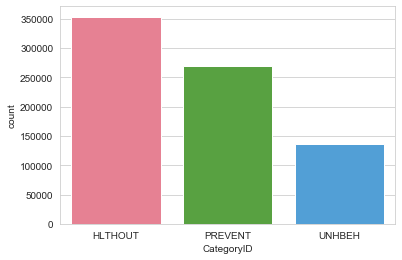

In [364]:
#Countplot for 3 categories-Healthoutcome,UnhealthyBehavior,PreventiveMeasures
sns.set_style("whitegrid")
sns.countplot(data=cleandata,x='CategoryID',palette='husl')
print('')

In [365]:
#Datavalue mean for each category
cleandata.groupby('CategoryID')["Data_Value"].mean()

CategoryID
HLTHOUT    13.136814
PREVENT    58.043545
UNHBEH     26.164686
Name: Data_Value, dtype: float64

In [372]:
#Population mean for each category
cleandata.groupby('CategoryID')["PopulationCount"].mean()

CategoryID
HLTHOUT    3785.944050
PREVENT    3786.613532
UNHBEH     3785.703087
Name: PopulationCount, dtype: float64

In [383]:
#Group by state,city and category to find average datvalue and populationcount
cleandata.PopulationCount = cleandata.PopulationCount.replace (',', '').astype (float).astype(int)
#cleandata.PopulationCount = cleandata.PopulationCount.str.replace (',', '').astype (float).astype(int)
cleandata_df=cleandata.groupby(['StateAbbr','CityName','CategoryID'])[['Data_Value','PopulationCount']].mean().reset_index()
cleandata_df

,StateAbbr,CityName,CategoryID,Data_Value,PopulationCount
0,AK,Anchorage,HLTHOUT,11.508811,5305.927273
1,AK,Anchorage,PREVENT,54.669273,5305.927273
2,AK,Anchorage,UNHBEH,24.916000,5305.927273
3,AL,Birmingham,HLTHOUT,17.001368,2356.044444
4,AL,Birmingham,PREVENT,60.233370,2358.582870
...,...,...,...,...,...
1495,WV,Charleston,PREVENT,63.519545,2334.136364
1496,WV,Charleston,UNHBEH,28.747273,2334.136364
1497,WY,Cheyenne,HLTHOUT,12.549038,3716.625000
1498,WY,Cheyenne,PREVENT,57.193125,3716.625000


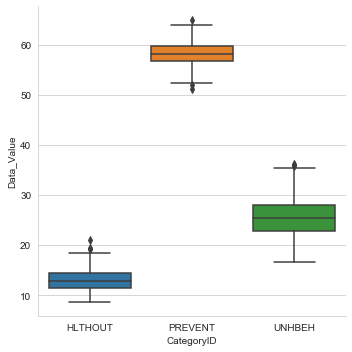

In [381]:
sns.catplot(x="CategoryID", y="Data_Value", kind="box", data=cleandata_df)

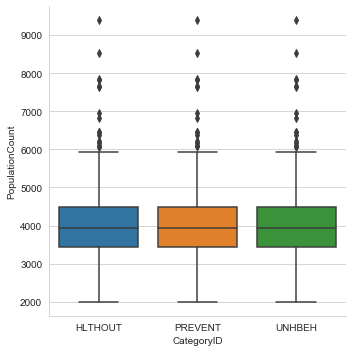

In [380]:
#fig=px.box(cleandata_df,x='CategoryID',y='PopulationCount')
#fig.show()
sns.catplot(x="CategoryID", y="PopulationCount", kind="box", data=cleandata_df)

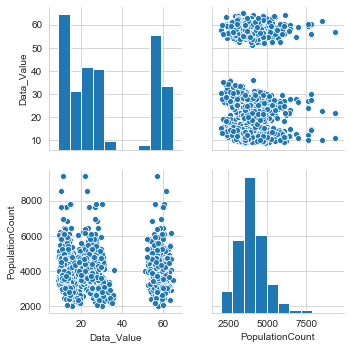

In [203]:
sns.pairplot(cleandata_df)

In [204]:
category_encoded = pd.get_dummies(cleandata_df, columns=['CategoryID'])
category_encoded

,StateAbbr,CityName,Data_Value,PopulationCount,CategoryID_HLTHOUT,CategoryID_PREVENT,CategoryID_UNHBEH
0,AK,Anchorage,11.508811,5305.927273,1,0,0
1,AK,Anchorage,54.669273,5305.927273,0,1,0
2,AK,Anchorage,24.916000,5305.927273,0,0,1
3,AL,Birmingham,17.001368,2356.044444,1,0,0
4,AL,Birmingham,60.233370,2358.582870,0,1,0
...,...,...,...,...,...,...,...
1495,WV,Charleston,63.519545,2334.136364,0,1,0
1496,WV,Charleston,28.747273,2334.136364,0,0,1
1497,WY,Cheyenne,12.549038,3716.625000,1,0,0
1498,WY,Cheyenne,57.193125,3716.625000,0,1,0


In [205]:
category_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StateAbbr           1500 non-null   object 
 1   CityName            1500 non-null   object 
 2   Data_Value          1500 non-null   float64
 3   PopulationCount     1500 non-null   float64
 4   CategoryID_HLTHOUT  1500 non-null   uint8  
 5   CategoryID_PREVENT  1500 non-null   uint8  
 6   CategoryID_UNHBEH   1500 non-null   uint8  
dtypes: float64(2), object(2), uint8(3)
memory usage: 51.4+ KB


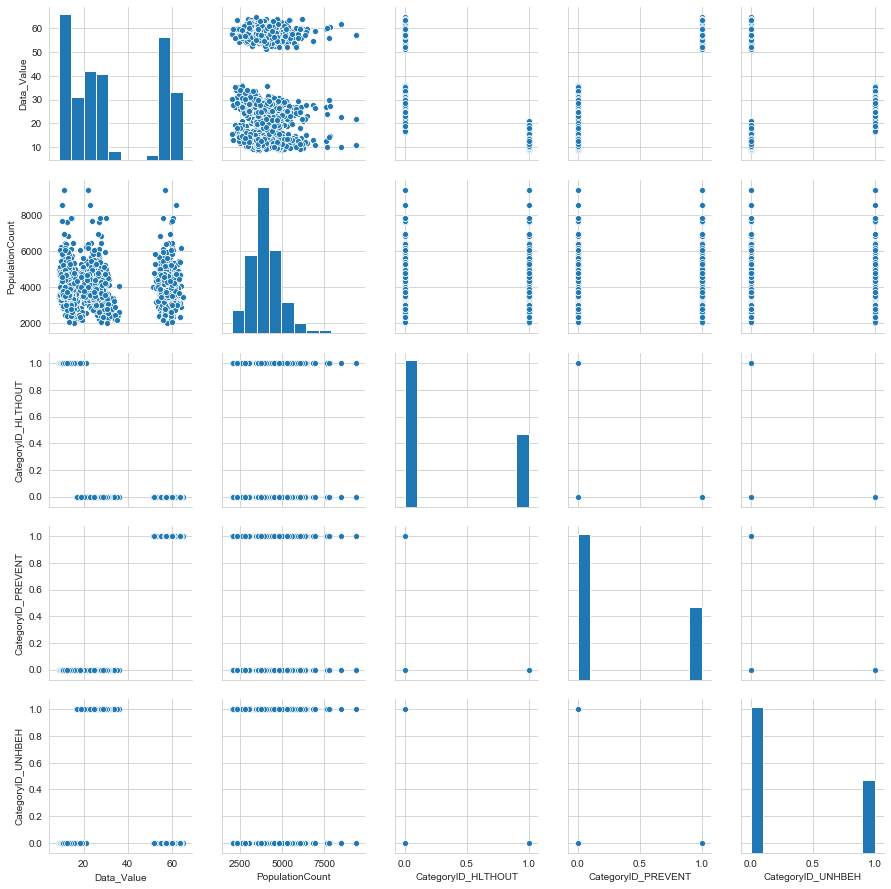

In [206]:
sns.pairplot(category_encoded)

In [221]:
#Converting categoryID's to categorical variables
category_encoded.CategoryID_PREVENT=category_encoded.CategoryID_PREVENT.astype('category')
category_encoded.CategoryID_HLTHOUT=category_encoded.CategoryID_HLTHOUT.astype('category')
category_encoded.CategoryID_UNHBEH=category_encoded.CategoryID_UNHBEH.astype('category')


In [222]:
category_encoded.info()
#category_encoded1=category_encoded.drop(columns=['StateAbbr','CityName'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   StateAbbr           1500 non-null   category
 1   CityName            1500 non-null   category
 2   Data_Value          1500 non-null   float64 
 3   PopulationCount     1500 non-null   float64 
 4   CategoryID_HLTHOUT  1500 non-null   category
 5   CategoryID_PREVENT  1500 non-null   category
 6   CategoryID_UNHBEH   1500 non-null   category
dtypes: category(5), float64(2)
memory usage: 59.2 KB


In [239]:
#category_encoded['StateAbbr'].isnull ().values.any ()
#category_encoded['CityName'].isnull ().values.any ()
#category_encoded['Data_Value'].isnull ().values.any ()
category_encoded['CategoryID_UNHBEH'].isnull ().values.any ()


False

In [241]:
#Drop StateAbbr and CityName
category_encoded1=category_encoded.drop(columns=['StateAbbr','CityName'])
category_encoded1

,Data_Value,PopulationCount,CategoryID_HLTHOUT,CategoryID_PREVENT,CategoryID_UNHBEH
0,11.508811,5305.927273,1,0,0
1,54.669273,5305.927273,0,1,0
2,24.916000,5305.927273,0,0,1
3,17.001368,2356.044444,1,0,0
4,60.233370,2358.582870,0,1,0
...,...,...,...,...,...
1495,63.519545,2334.136364,0,1,0
1496,28.747273,2334.136364,0,0,1
1497,12.549038,3716.625000,1,0,0
1498,57.193125,3716.625000,0,1,0


In [336]:
#x1=category_encoded1['Data_Value']
#x2=np.array('x1').reshape(1,-1)
#y=category_encoded1.drop(columns=['Data_Value'])
#y1=np.array('y').reshape(1,-1)
x=category_encoded1.drop(columns=['Data_Value'])
y=category_encoded1['Data_Value']

In [288]:
y

,PopulationCount,CategoryID_HLTHOUT,CategoryID_PREVENT,CategoryID_UNHBEH
0,5305.927273,1,0,0
1,5305.927273,0,1,0
2,5305.927273,0,0,1
3,2356.044444,1,0,0
4,2358.582870,0,1,0
...,...,...,...,...
1495,2334.136364,0,1,0
1496,2334.136364,0,0,1
1497,3716.625000,1,0,0
1498,3716.625000,0,1,0


In [277]:
#y=category_encoded1[['CategoryID_HLTHOUT','CategoryID_PREVENT','CategoryID_UNHBEH']]
y=category_encoded1[['CategoryID_HLTHOUT']]
y1=np.array('y').reshape(1,-1)
#x1=category_encoded1
x1=category_encoded1.drop(columns='CategoryID_HLTHOUT')
x2=np.array('x1').reshape(1,-1)

In [337]:
train_x, test_x , train_y, test_y  = train_test_split(x,y,train_size=0.7,random_state=0,shuffle=2)
train_shape = train_x.shape
test_shape = test_x.shape


print("Shape of the training set is {}".format(train_shape))
print("Shape of the testing set is {}".format(test_shape))

Shape of the training set is (1050, 4)
Shape of the testing set is (450, 4)


In [338]:
train_x,train_y

(      PopulationCount CategoryID_HLTHOUT CategoryID_PREVENT CategoryID_UNHBEH
 519       4657.538462                  1                  0                 0
 1032      3983.948905                  1                  0                 0
 557       3453.000000                  0                  0                 1
 642       3508.833333                  1                  0                 0
 651       3991.882353                  1                  0                 0
 ...               ...                ...                ...               ...
 763       4495.428571                  0                  1                 0
 835       4142.215596                  0                  1                 0
 1216      2634.514793                  0                  1                 0
 559       3954.495050                  0                  1                 0
 684       3394.926952                  1                  0                 0
 
 [1050 rows x 4 columns], 519     11.784024
 1032 

In [339]:
lgr = LinearRegression()
lgr.fit(train_x,train_y)
preds = lgr.predict(test_x)

mean_squared_error(preds,test_y)

# You will use accuracy score as the metric to determine what is the accuracy
#acc_score =accuracy_score(preds,test_y)
#print("Accuracy score of the fit is {}".format(acc_score))

6.90473280961463

In [343]:
rnse=np.sqrt(metrics.mean_squared_error(preds,test_y))
print("root squared error is {}".format(rnse))

root squared error is 2.627685827798793
